## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Analyze the stocks data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# make a copy of the original data
df = data.copy()

In [4]:
# view the first five rows of the data
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [5]:
# check the dimensionality of the data frame
df.shape

(340, 15)

#### Observation:
- The data set has 340 rows and 15 columns

In [6]:
# print information about the data frame and check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [7]:
# check if there are duplicates
df.duplicated().any()

False

#### Observation:
- There are no duplicates 

In [8]:
# check fopr missing values
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observation:
- There are no missing values

In [9]:
# look at random sample of 5 rows
df.sample(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
177,JPM,JPMorgan Chase & Co.,Financials,Banks,66.029999,8.033377,1.130337,10,99,-7341000000,24442000000,6.05,4.040000e+09,10.914049,-1.886881
194,LYB,LyondellBasell,Materials,Diversified Chemicals,86.900002,2.573183,1.609745,68,46,-107000000,4476000000,9.62,4.652807e+08,9.033264,10.316354
252,PNC,PNC Financial Services,Financials,Banks,95.309998,6.993709,1.120534,9,99,-295000000,4106000000,7.52,5.460106e+08,12.674202,-0.694126
55,CBG,CBRE Group,Real Estate,Real Estate Services,34.580002,8.197757,1.297857,20,12,-200481000,547132000,1.64,3.336171e+08,21.085367,-3.415302
211,MNST,Monster Beverage,Consumer Staples,Soft Drinks,49.653332,10.800357,1.585944,11,568,1805094000,546733000,3.71,1.469542e+09,25.420118,-5.190734


In [10]:
# generate descriptive Statistics of the data frame
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [11]:
df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

####  Observation:
- The companies in the data set fall into 11 economic sectors 
- Industrials sector has the biggest number of companies

## Exploratory Data Analysis (EDA)

## Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


### Current Price
**What does the distribution of stock prices look like?**

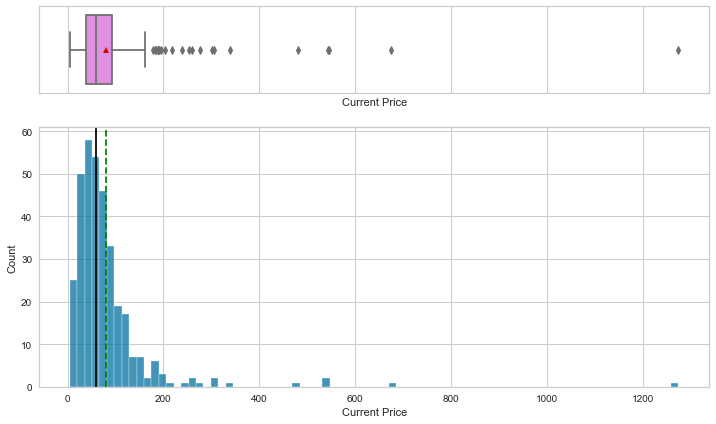

In [13]:
histogram_boxplot(df, 'Current Price')

### Price Change

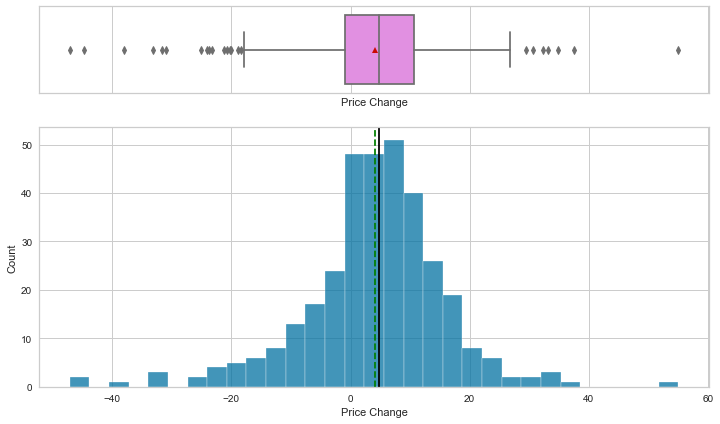

In [14]:
histogram_boxplot(df, 'Price Change')

### Distribution of cash ratio

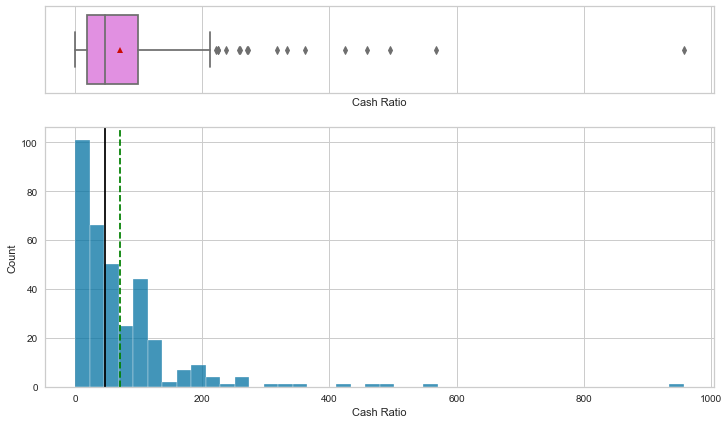

In [15]:
histogram_boxplot(df, 'Cash Ratio')

### Distribution of Roe

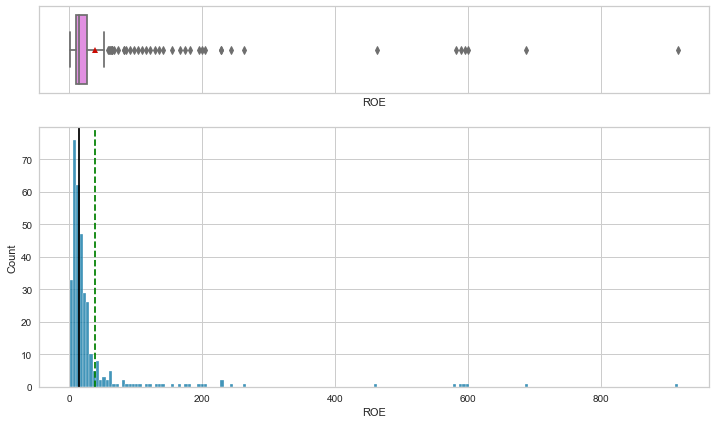

In [16]:
histogram_boxplot(df, 'ROE')

### Distribution of Net Cash Flow

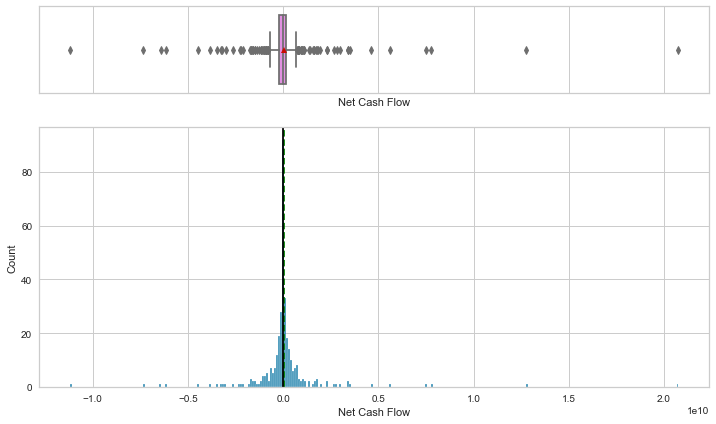

In [17]:
histogram_boxplot(df, 'Net Cash Flow')

### P/E RATIO

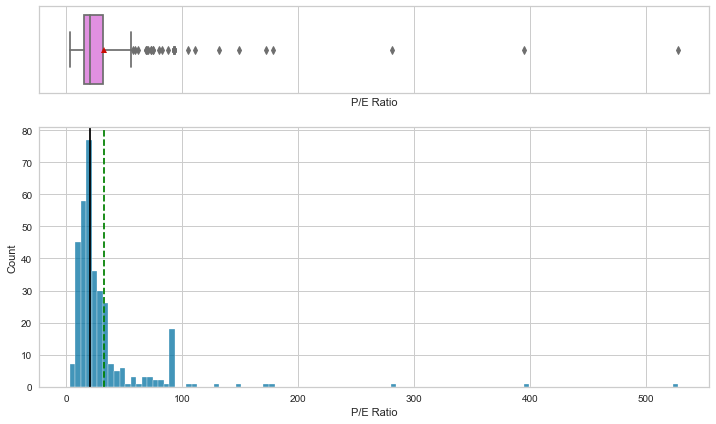

In [18]:
histogram_boxplot(df, 'P/E Ratio')

### P/B RATIO

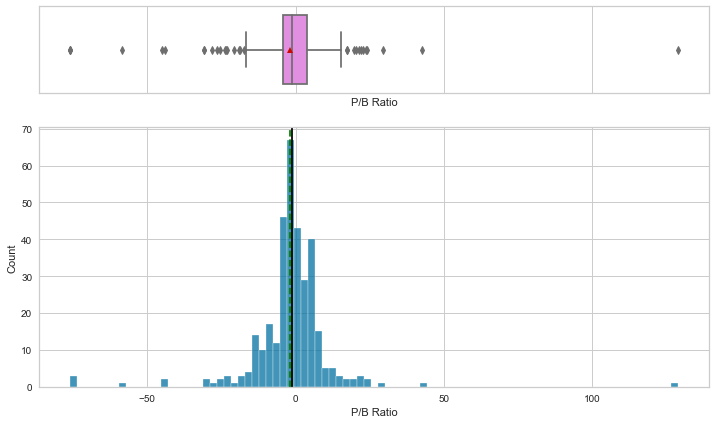

In [19]:
histogram_boxplot(df, 'P/B Ratio')

### Estimated Shares Outstanding

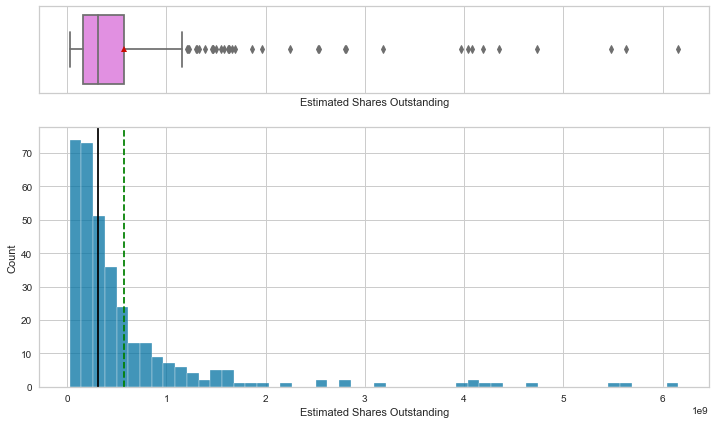

In [20]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

### Earnings Per Share

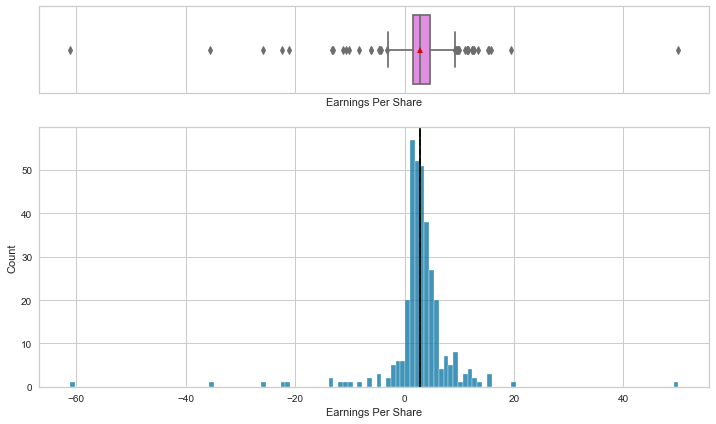

In [21]:
histogram_boxplot(df, 'Earnings Per Share')

### Volatility 

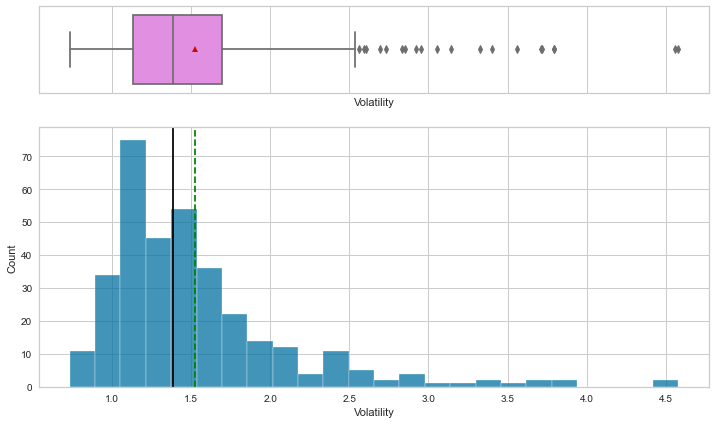

In [22]:
histogram_boxplot(df, 'Volatility')

### Distribution of Net Income

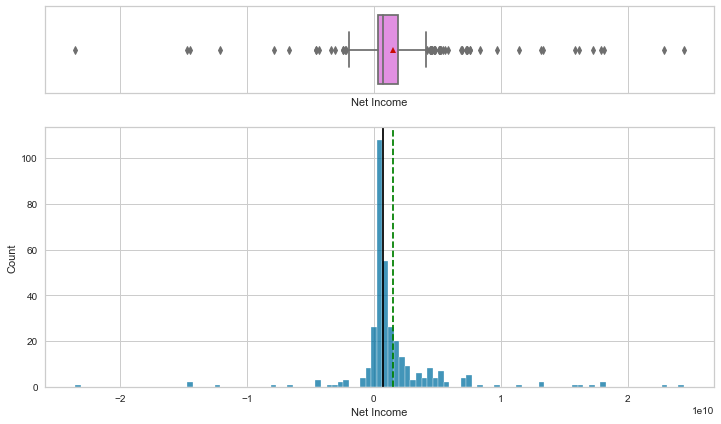

In [23]:
histogram_boxplot(df, 'Net Income')

In [24]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### GICS Sector

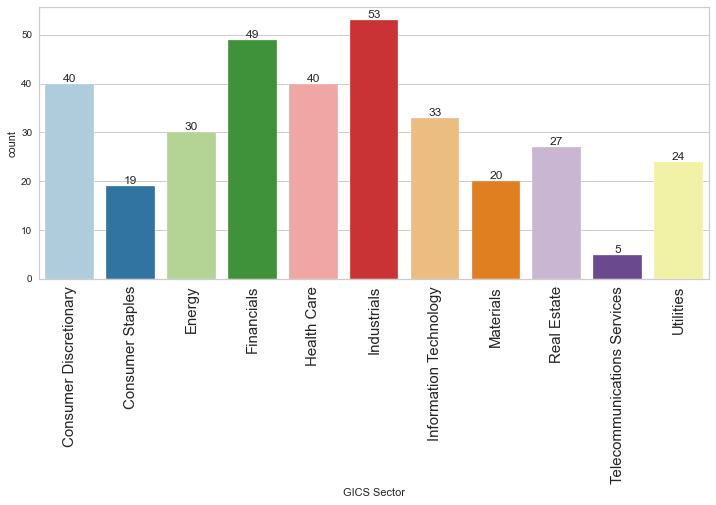

In [25]:
labeled_barplot(df, "GICS Sector")

#### Observation:
- The industrial sector has the biggest amount of companies

### GICS Sub Industry

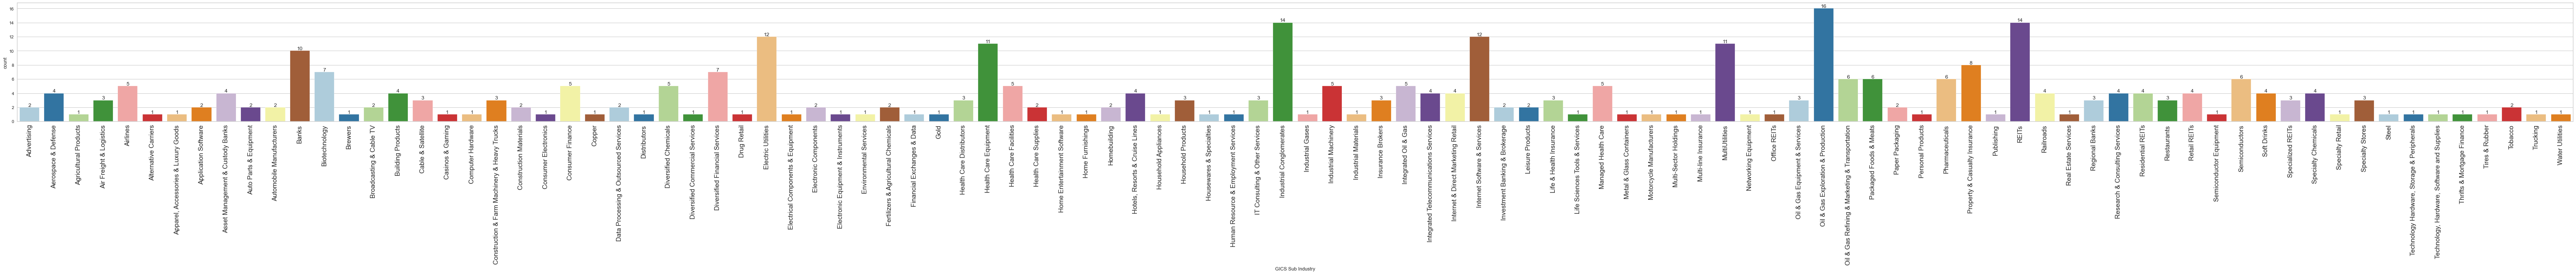

In [26]:
labeled_barplot(df, "GICS Sub Industry")

## Bivariate Analysis

**How are the different variables correlated with each other?**

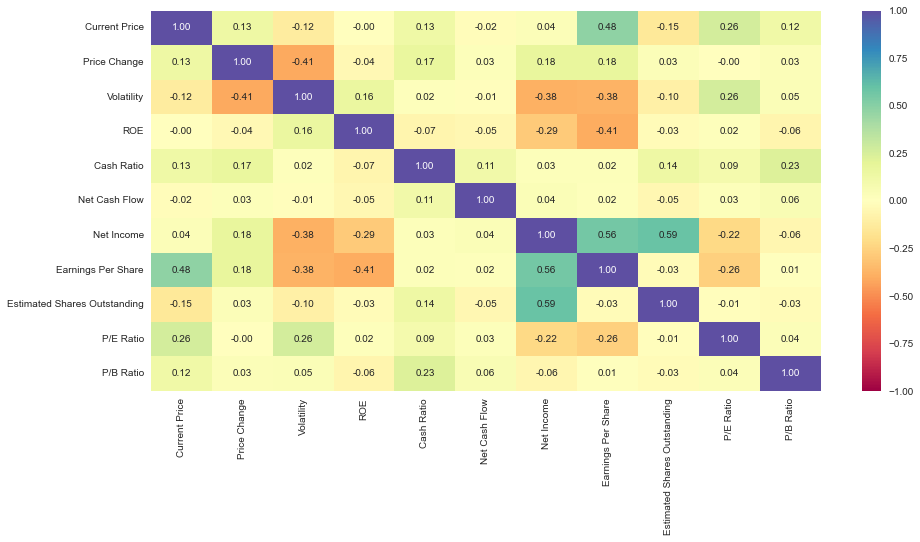

In [27]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- Earnings per share and Estimated shares outstanding show a moderately positive high correlation with Net Income

### Cash Ratio vs GICS Sector

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

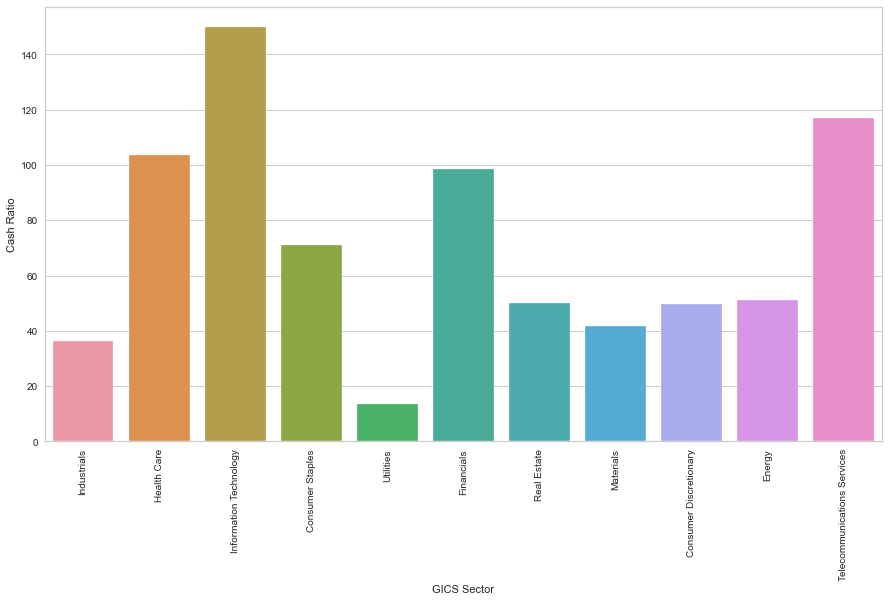

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y='Cash Ratio', ci=False)
plt.xticks(rotation=90);

#### Observation:
- The information Sector has the highest ability to cover its liabilities using only cash and cash equivalents

### Current Price vs GICS Sector

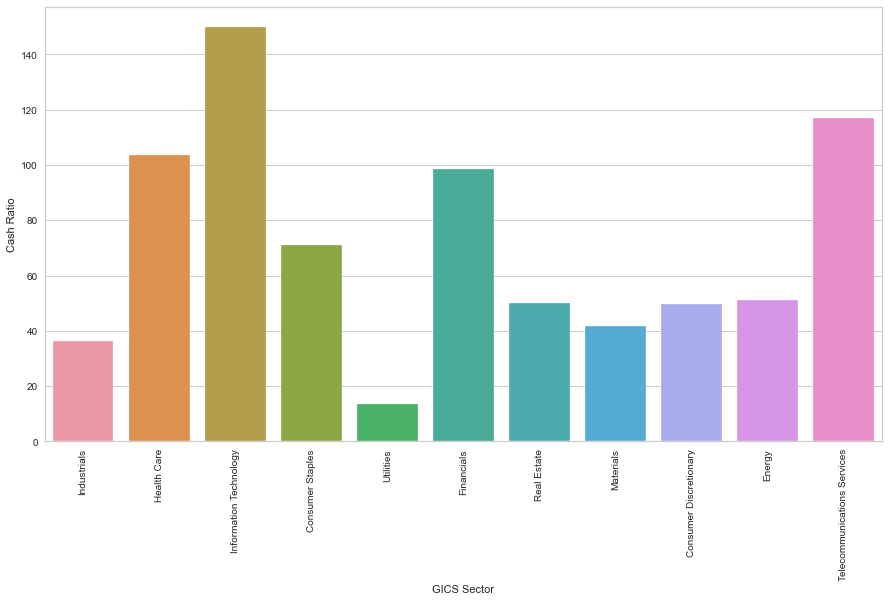

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y='Cash Ratio', ci=False)
plt.xticks(rotation=90);

### Price Change vs GICS Sector

**The stocks of which economic sector have seen the maximum price decrease on average?**

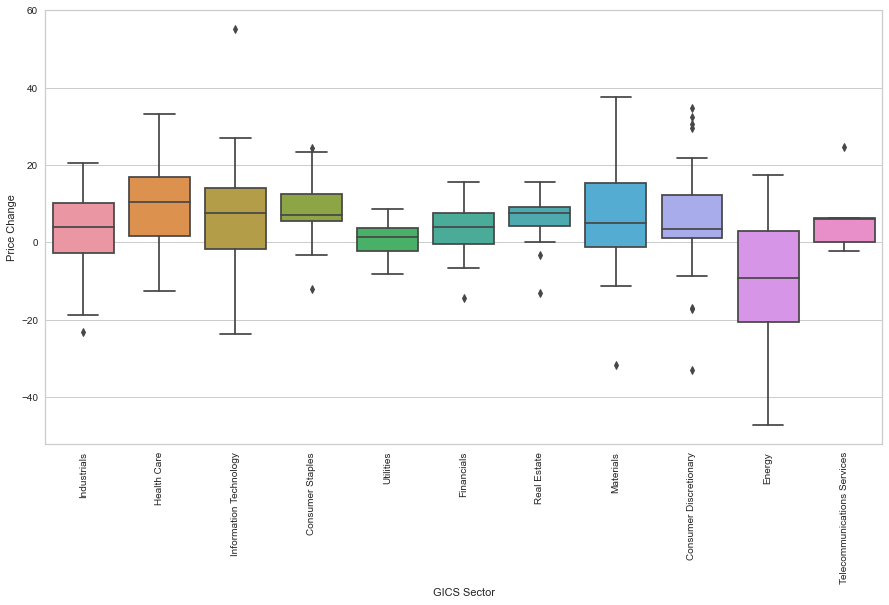

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='GICS Sector', y='Price Change')
plt.xticks(rotation=90);

#### Observation:
- The stock prices in the energy sector show that they are mostly decreasing

### Volatility vs GICS Sector

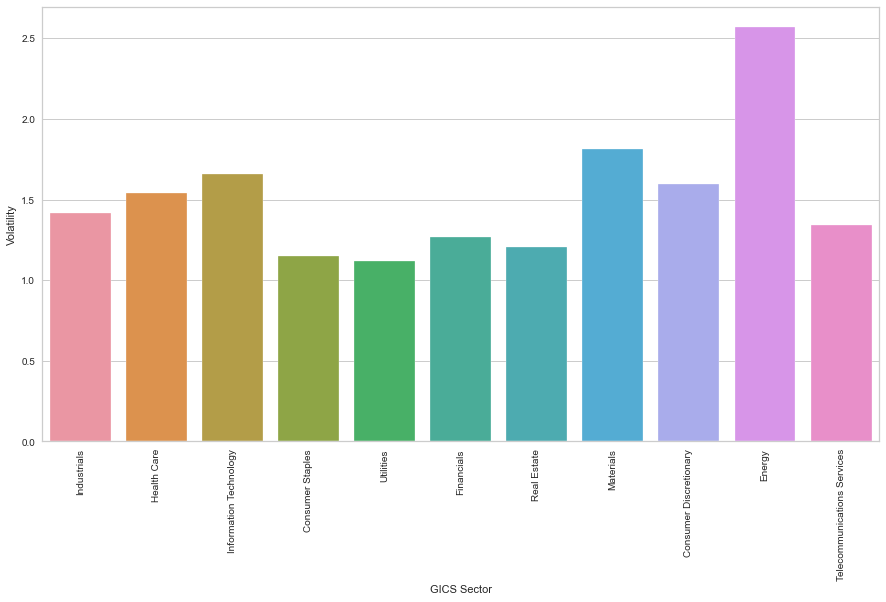

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90);

#### Observations:
- The Energy Sector has the highest degree of variation of a trading price series over the past 13 weeks. This means that it is high risk investment.

### P/E Ratio vs GICS Sector

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

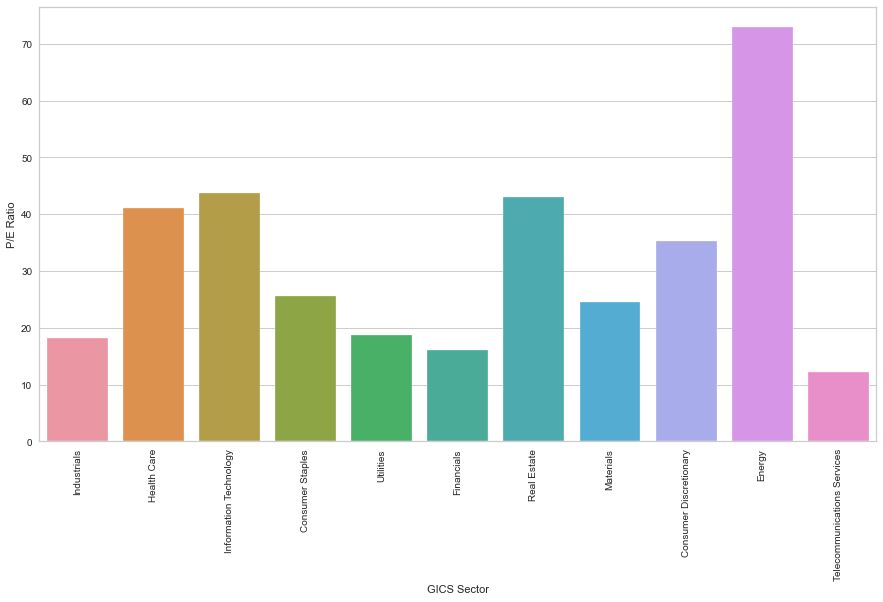

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90);

#### Observations:
- The Energy Sector stocks have a higher price to earnings ratio hence Investors expect higher growth rates in future

## Data Preprocessing

### Outlier Check

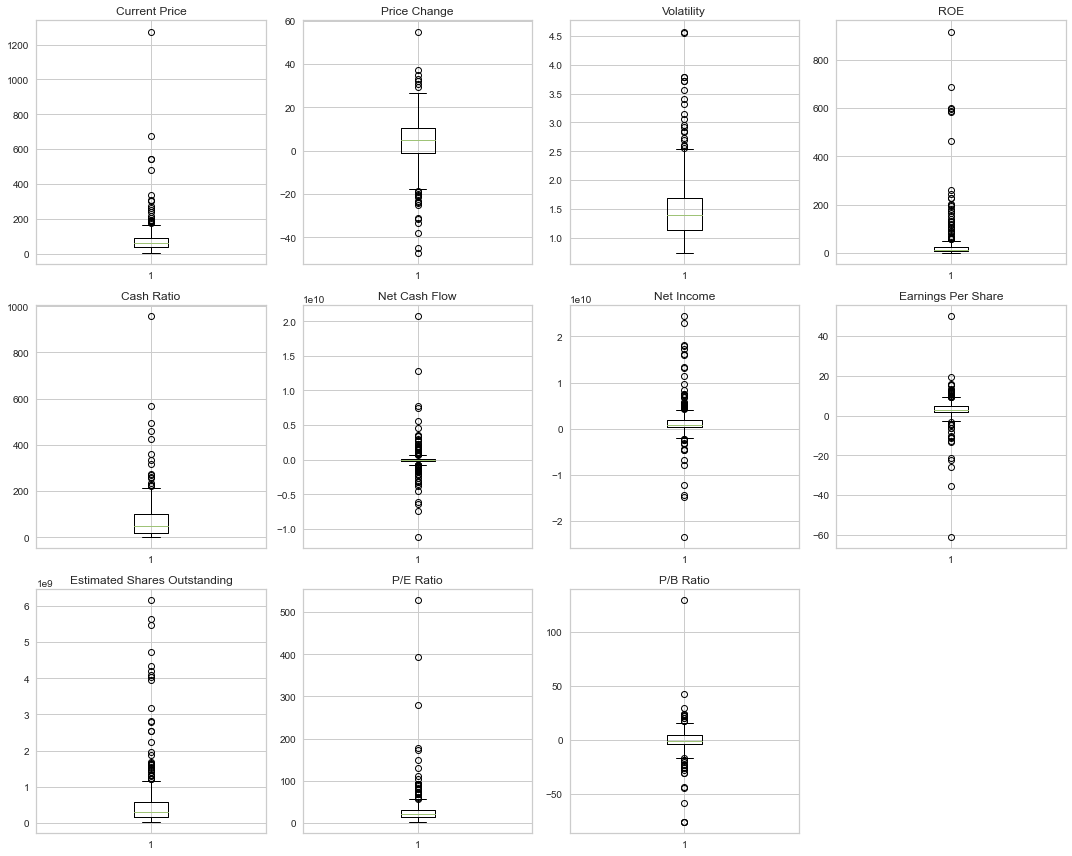

In [33]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable);

#### Observation:
- All the numerical columns have outliers
- K means is very sensitive to outliers since it is about finding mean of clusters
- I will there for treat out the outliers to prevent the impact they will be having on the clustering
- The same will be done for agglomerative clustering

In [34]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [35]:
# create a new data frame after treating outliers in the colums
df1 = treat_outliers_all(df, numeric_columns)

### Recheck if outliers were treated

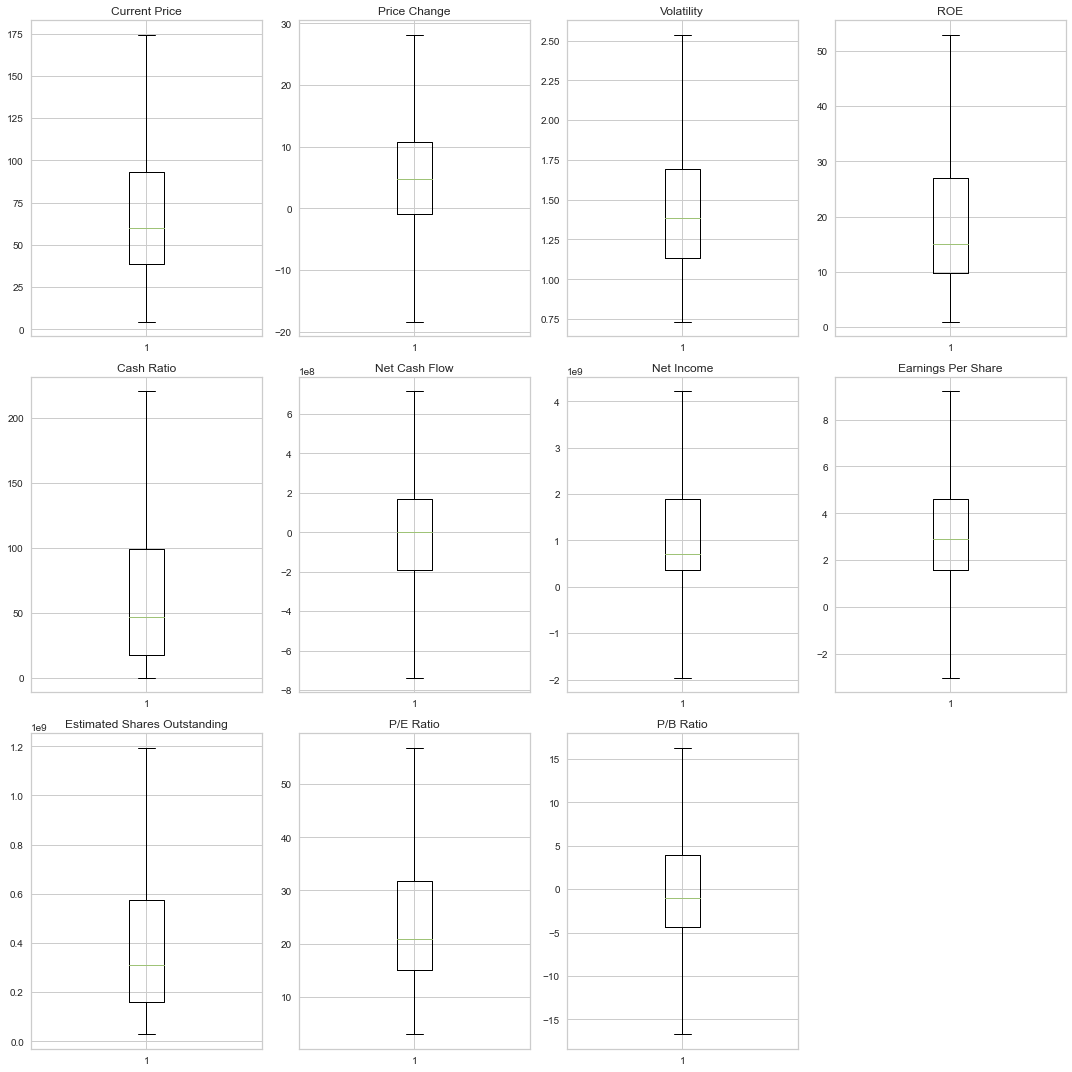

In [36]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- Outliers have been treated

### Scaling the data
**Let us scale the data before we proceed with clustering**

In [37]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["GICS Sector", "Ticker Symbol", "Security", "GICS Sub Industry"], axis=1)),
    columns=df.drop(["GICS Sector", "Ticker Symbol", "Security", "GICS Sub Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.650712,0.549287,0.448212,2.116831,-0.207311,-1.433763,1.977138,2.114902,0.645054,-1.493768,-0.997339
1,-0.257962,0.387909,1.568844,2.116831,0.238584,0.133007,1.977138,0.017981,2.124799,-0.462139,-0.992836
2,-0.591183,0.675734,-0.459081,0.031532,0.067086,1.722229,1.977138,-0.054640,2.124799,-0.703554,0.108970
3,0.548932,0.935802,-0.274700,-0.753522,2.005016,-0.565079,-0.371735,-0.635605,0.171420,2.138684,0.714710
4,-0.349115,-0.600175,0.478969,-0.426416,2.699583,0.764786,-0.327678,-0.964127,2.124799,2.138684,0.300691


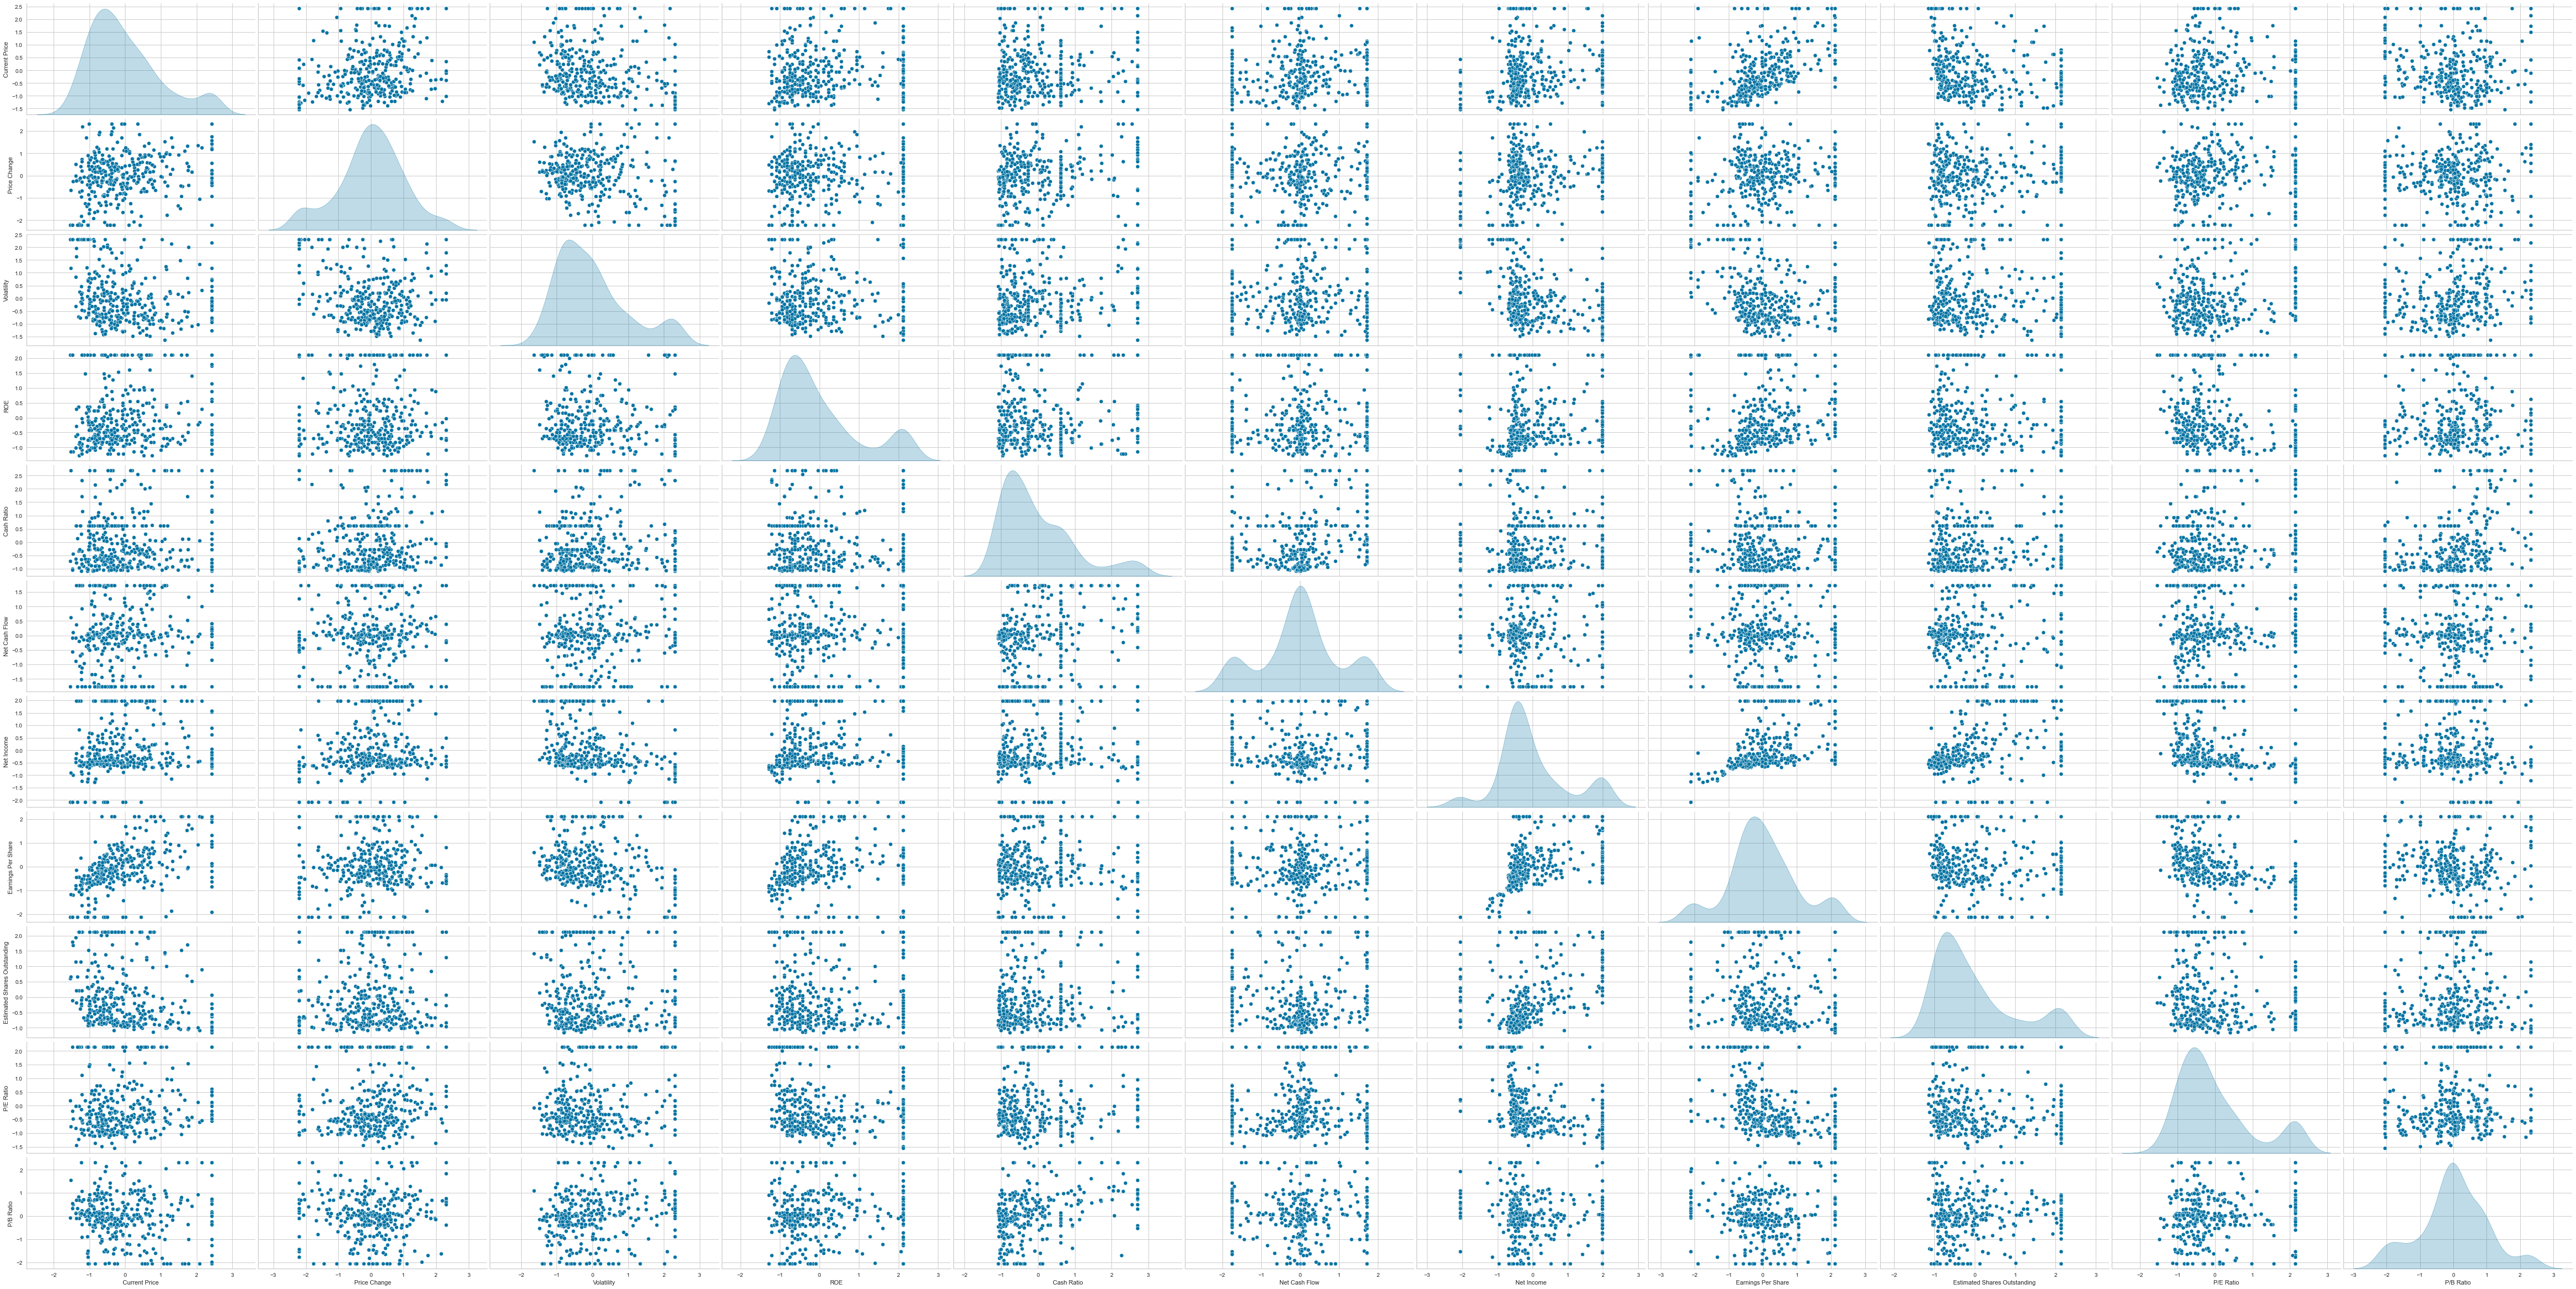

In [38]:
# pairplot to give an idea of how many clusters we may need
sns.pairplot(subset_scaled_df, height=3, aspect=2, diag_kind='kde');

####  Observation:
- According to the pairplot, we see that we will need atleast 4 clusters

## K-means Clustering

In [39]:
# make copy of the scaled data set
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9507542400143842
Number of Clusters: 3 	Average Distortion: 2.759761533270845
Number of Clusters: 4 	Average Distortion: 2.63153843620545
Number of Clusters: 5 	Average Distortion: 2.5345886566890665
Number of Clusters: 6 	Average Distortion: 2.4703313338147543
Number of Clusters: 7 	Average Distortion: 2.3892036349104346
Number of Clusters: 8 	Average Distortion: 2.3415378767145505
Number of Clusters: 9 	Average Distortion: 2.302109092619317
Number of Clusters: 10 	Average Distortion: 2.2377809582576833
Number of Clusters: 11 	Average Distortion: 2.204551626221652
Number of Clusters: 12 	Average Distortion: 2.183120889408329
Number of Clusters: 13 	Average Distortion: 2.136519876101571
Number of Clusters: 14 	Average Distortion: 2.1093177250276294


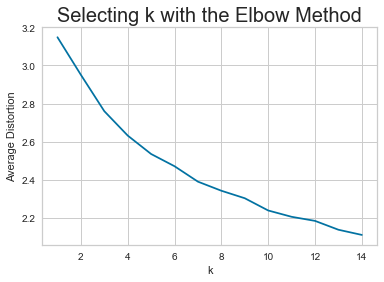

In [40]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

#### Observation:
- The elbow method shows that we may need 5 clusters

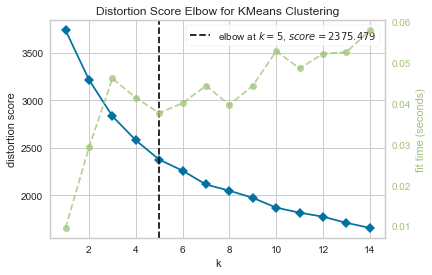

In [41]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

#### Observation:
- According to the KElbow Visualizer, 5 is agood number of clusters for this data set

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.14040363305436732)
For n_clusters = 3, the silhouette score is 0.1818864171381463)
For n_clusters = 4, the silhouette score is 0.1653160289647168)
For n_clusters = 5, the silhouette score is 0.14591373480130365)
For n_clusters = 6, the silhouette score is 0.14123009384579105)
For n_clusters = 7, the silhouette score is 0.13718112897820767)
For n_clusters = 8, the silhouette score is 0.13111986503005277)
For n_clusters = 9, the silhouette score is 0.12839314434358204)
For n_clusters = 10, the silhouette score is 0.13936669609632177)
For n_clusters = 11, the silhouette score is 0.13539332669998302)
For n_clusters = 12, the silhouette score is 0.13543944176814168)
For n_clusters = 13, the silhouette score is 0.13808929034629017)
For n_clusters = 14, the silhouette score is 0.12467396300203645)


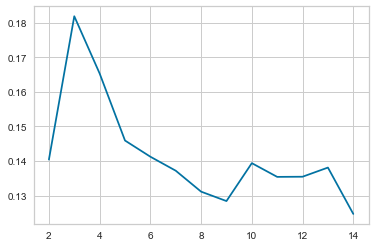

In [42]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score);

**From the silhouete scores, it seems five is a good value of k**

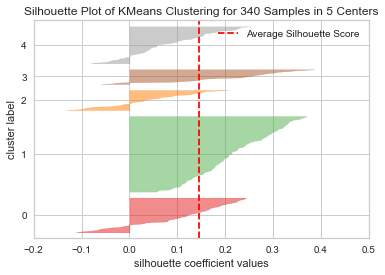

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

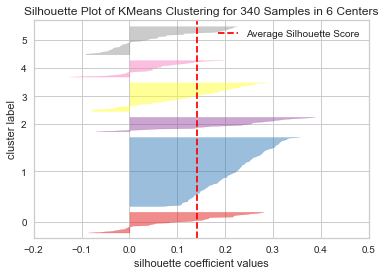

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

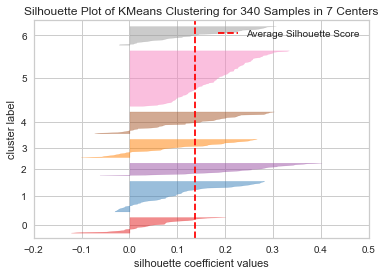

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

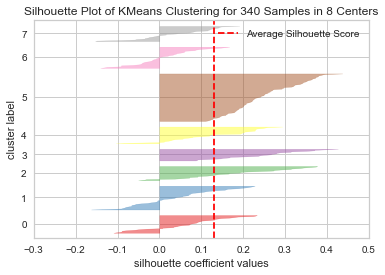

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**From the silhouette scores, it seems that 5 and 6 is a good value of k.**

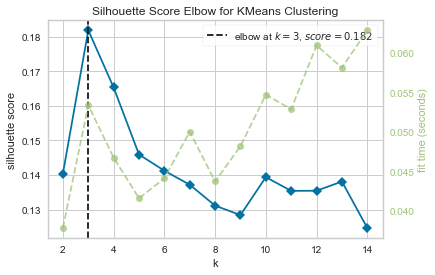

In [47]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

**Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knee at 5 in the elbow curve.**

In [48]:
%%time
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(k_means_df)

CPU times: user 267 ms, sys: 19.7 ms, total: 287 ms
Wall time: 45.9 ms


KMeans(n_clusters=5, random_state=0)

In [49]:
# creating a copy of the original data
df2 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df2["K_means_segments"] = kmeans.labels_

### Cluster profiling

In [50]:
cluster_profile = df2.groupby("K_means_segments").mean()

In [51]:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Security"].count().values
)

In [52]:
# let's display cluster profiles and mark maximum values
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,90.103904,9.978634,1.718664,18.776316,178.750000,263078891.447368,663987243.421053,2.480559,461549894.308224,37.194404,6.632600,38
1,48.803347,4.913673,1.399956,13.975543,48.862319,-81855490.942029,735330347.826087,2.229964,343871685.804004,22.977434,-1.990010,138
2,32.458886,-10.613519,2.385627,26.892857,41.964286,-95120821.428571,-1004226116.071429,-1.705000,498906599.277321,47.240851,1.154067,28
3,117.604606,4.416986,1.347950,26.625000,36.205479,-37673693.493151,1032481041.095890,5.405548,181097219.297123,23.955074,-4.300146,73
4,67.628524,6.281662,1.277405,25.990079,65.023810,81699603.174603,3702123382.936508,4.832698,904178309.649802,16.452379,-1.758998,63


In [53]:
# let's display cluster profiles and mark the minimum values
cluster_profile.style.highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,90.103904,9.978634,1.718664,18.776316,178.750000,263078891.447368,663987243.421053,2.480559,461549894.308224,37.194404,6.632600,38
1,48.803347,4.913673,1.399956,13.975543,48.862319,-81855490.942029,735330347.826087,2.229964,343871685.804004,22.977434,-1.990010,138
2,32.458886,-10.613519,2.385627,26.892857,41.964286,-95120821.428571,-1004226116.071429,-1.705000,498906599.277321,47.240851,1.154067,28
3,117.604606,4.416986,1.347950,26.625000,36.205479,-37673693.493151,1032481041.095890,5.405548,181097219.297123,23.955074,-4.300146,73
4,67.628524,6.281662,1.277405,25.990079,65.023810,81699603.174603,3702123382.936508,4.832698,904178309.649802,16.452379,-1.758998,63


In [54]:
# let's see the names of the companies in each cluster
for cl in df2["K_means_segments"].unique():
    print(
        "The",
        df2[df2["K_means_segments"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df2[df2["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 63 companies in cluster 4 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories' 'AFLAC Inc'
 'American International Group, Inc.' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'BB&T Corporation'
 'The Bank of New York Mellon Corp.' 'Citigroup Inc.' 'Colgate-Palmolive'
 'Capital One Financial' 'CSX Corp.' 'CVS Health' 'Chevron Corp.'
 'Delta Air Lines' 'Deere & Co.' 'Discover Financial Services'
 'Danaher Corp.' 'The Walt Disney Company' 'Ford Motor' 'Gilead Sciences'
 'General Motors' "Honeywell Int'l Inc." 'HP Inc.'
 'International Business Machines' 'Intel Corp.' 'JPMorgan Chase & Co.'
 'Coca Cola Company' 'Lilly (Eli) & Co.' 'Southwest Airlines'
 'Level 3 Communications' 'LyondellBasell' 'Mastercard Inc.'
 "McDonald's Corp." 'Mondelez International' 'MetLife Inc.' '3M Company'
 'Altria Group Inc' 'Marathon Petroleum' 'Merck & Co.' 'PepsiCo Inc.'
 'Pfizer Inc.' 'Philip Morris International' 'PNC Financial Services'
 'Prudential Financial' 'Phillips 66' '

In [55]:
# check how many Companies are in a given GICS sector in a given segment
df2.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          4
                  Consumer Staples                2
                  Energy                          2
                  Financials                      1
                  Health Care                    10
                  Information Technology         14
                  Materials                       3
                  Real Estate                     1
                  Telecommunications Services     1
1                 Consumer Discretionary         18
                  Consumer Staples                6
                  Financials                     25
                  Health Care                    10
                  Industrials                    22
                  Information Technology         10
                  Materials                       8
                  Real Estate                    17
                  Telecommunications Services     1
                  

**Boxplot of numerical variables for each cluster**

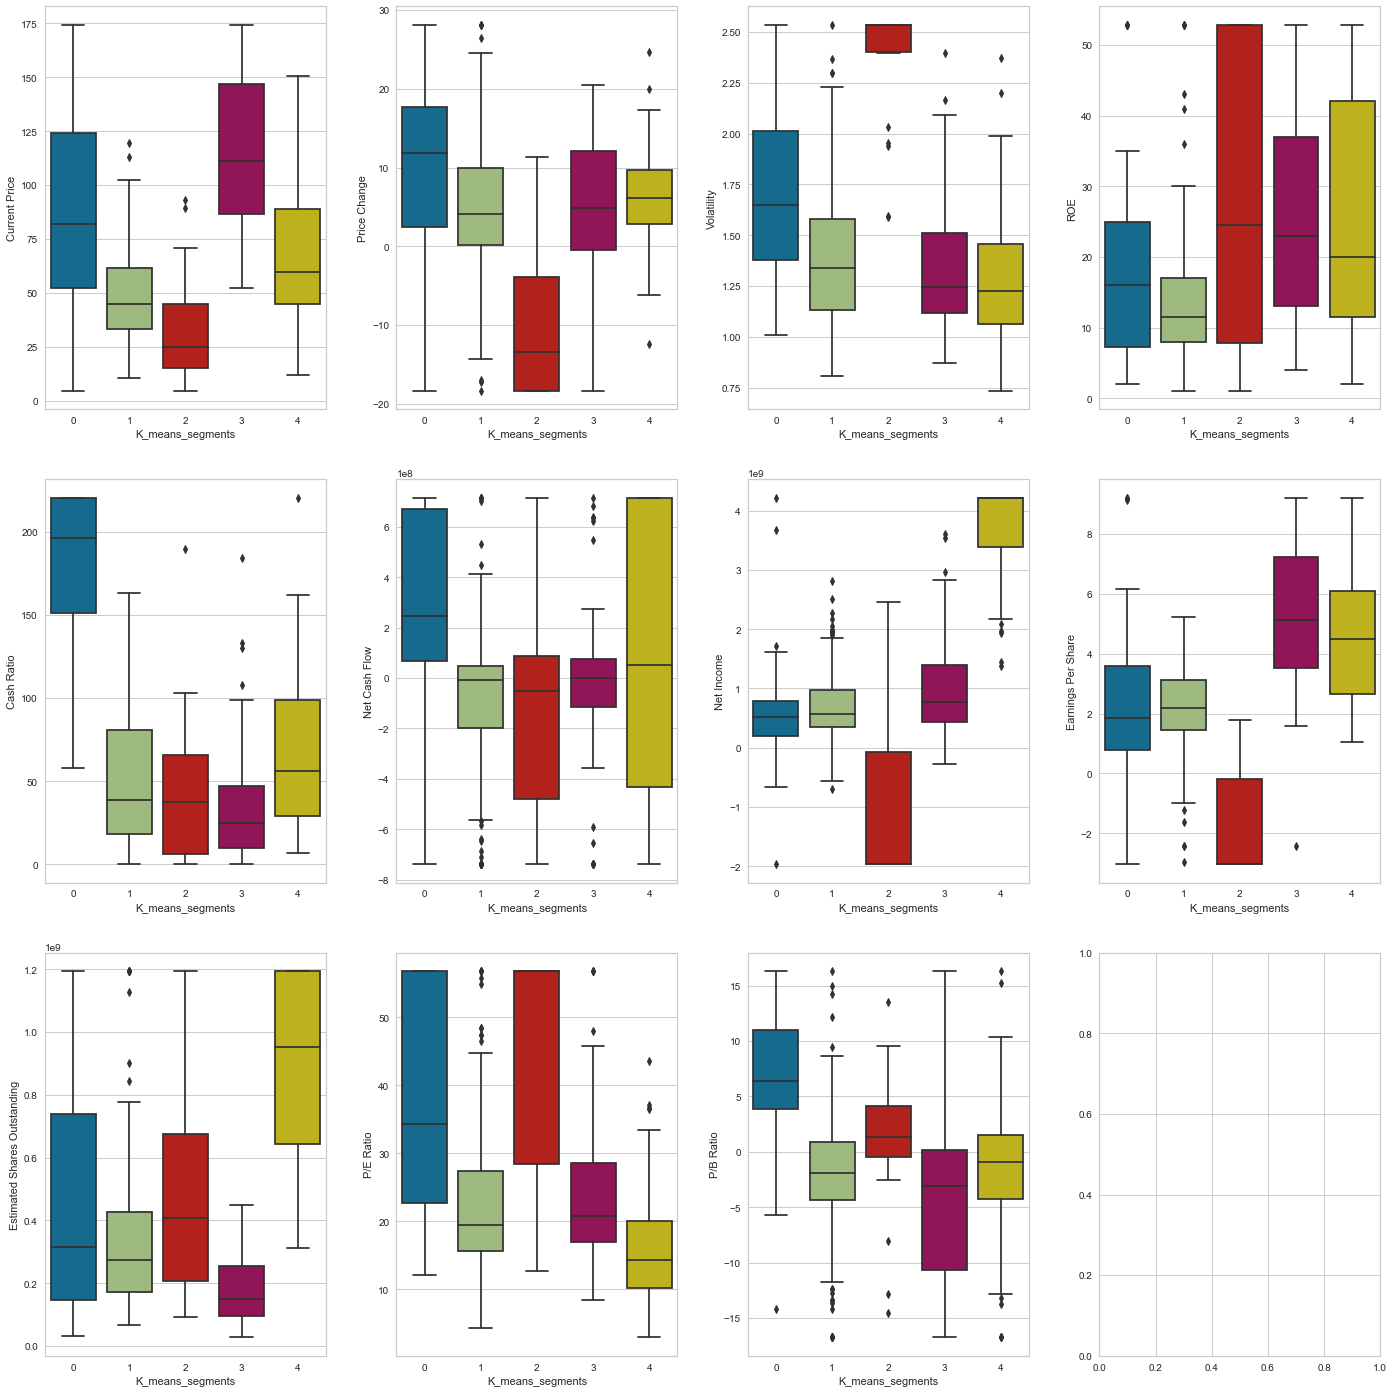

In [56]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Hierarchical Clustering

In [57]:
# make a copy of the scaled data frame
hc_df = subset_scaled_df.copy()

In [58]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136777.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988987.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746494.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3854304450443973.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925732.
Cophenetic c

In [59]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [60]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6932108674136777.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988987.
Cophenetic correlation for centroid linkage is 0.7294329307928586.
Cophenetic correlation for ward linkage is 0.5753306117577637.
Cophenetic correlation for weighted linkage is 0.6496438783746494.


In [61]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and Average linkage.**

**Let's see the dendrograms for the different linkage methods.**

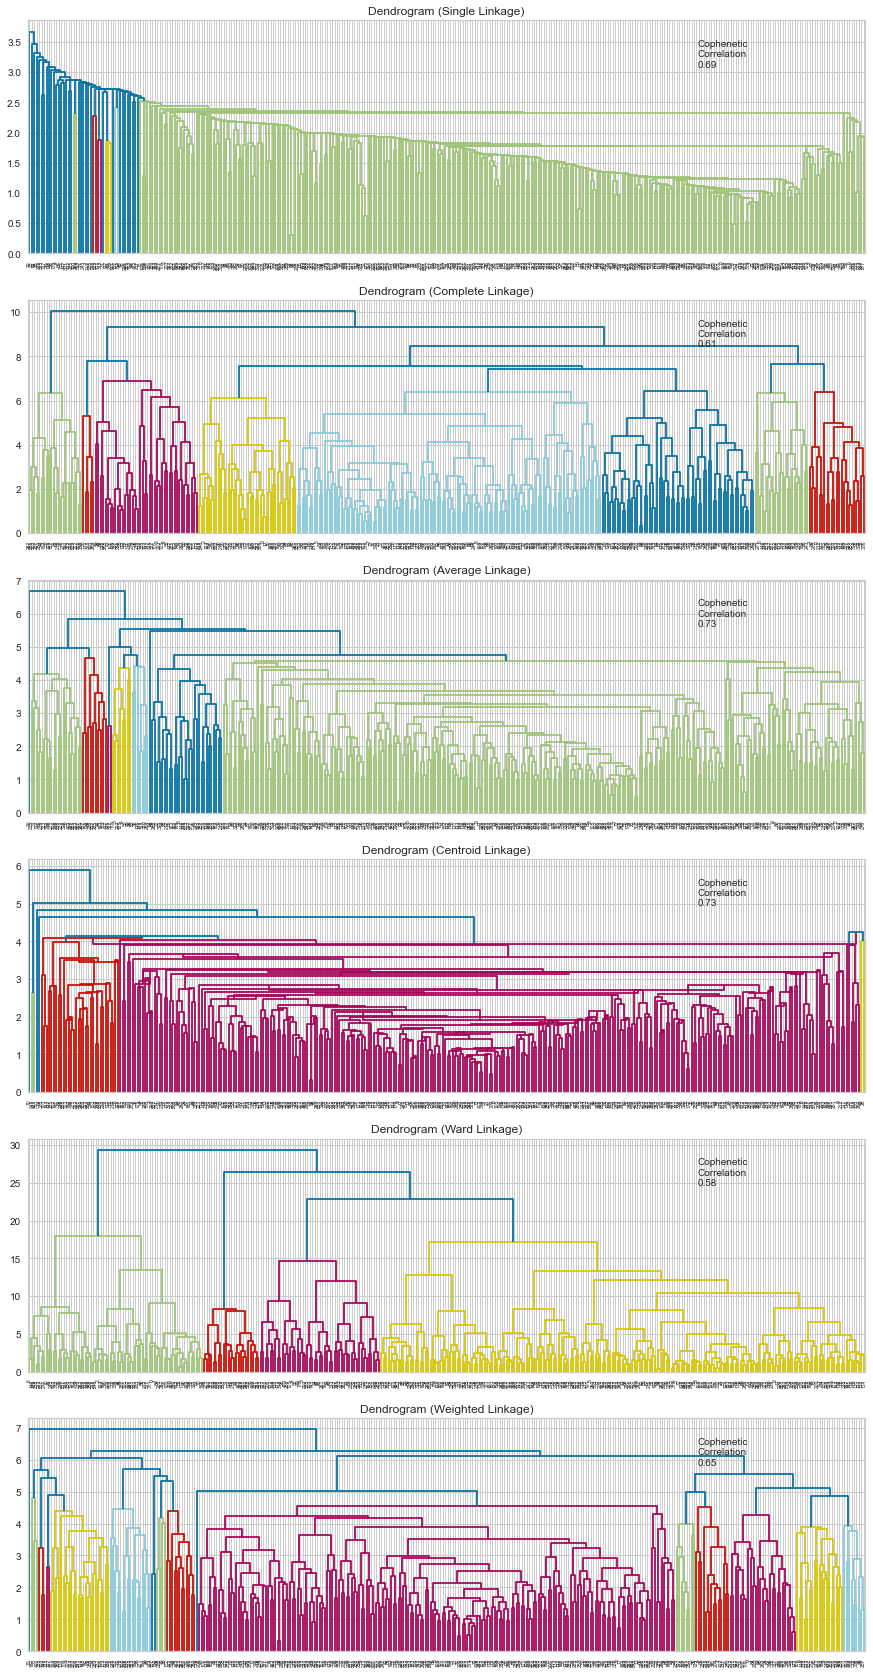

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [63]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

CPU times: user 4.41 ms, sys: 982 µs, total: 5.39 ms
Wall time: 4.39 ms


AgglomerativeClustering(linkage='average', n_clusters=5)

In [64]:
# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_Clusters"] = HCmodel.labels_
df3["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [65]:
hc_cluster_profile = df3.groupby("HC_Clusters").mean()

In [66]:
hc_cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Security"].count().values
)

In [67]:
# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,124.283384,17.649246,1.702071,19.338235,191.352941,217965698.529412,922378654.411765,3.054338,426077063.146176,42.799223,7.215829,17
1,70.175620,5.081576,1.369438,20.025862,55.189655,-21331598.706897,1435189369.396552,3.592599,438277246.543207,22.157904,-2.083928,290
2,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31
3,174.367503,-18.391948,2.474002,22.000000,220.500000,-171460000.000000,475602000.000000,9.213750,31085098.040000,31.362745,16.320749,1
4,174.367503,3.598507,1.697942,52.875000,0.000000,2000000.000000,-271000000.000000,-2.430000,111522633.700000,20.819876,-16.755740,1


In [68]:
# let's display cluster profiles and mark the minimum values
hc_cluster_profile.style.highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,124.283384,17.649246,1.702071,19.338235,191.352941,217965698.529412,922378654.411765,3.054338,426077063.146176,42.799223,7.215829,17
1,70.175620,5.081576,1.369438,20.025862,55.189655,-21331598.706897,1435189369.396552,3.592599,438277246.543207,22.157904,-2.083928,290
2,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31
3,174.367503,-18.391948,2.474002,22.000000,220.500000,-171460000.000000,475602000.000000,9.213750,31085098.040000,31.362745,16.320749,1
4,174.367503,3.598507,1.697942,52.875000,0.000000,2000000.000000,-271000000.000000,-2.430000,111522633.700000,20.819876,-16.755740,1


In [69]:
# let's see the names of the companies in each cluster
for cl in df3["HC_Clusters"].unique():
    print(
        "The",
        df3[df3["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df3[df3["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 290 companies in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Alliance Data Systems' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Citigroup Inc.' 'Caterpillar Inc.' 'Chu

#### Observations:
- Cluster 1 is the largest with 290 companies
- Cluster 4 and 3 have only 1 company in each

In [70]:
df3.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          3
             Health Care                     8
             Information Technology          5
             Real Estate                     1
1            Consumer Discretionary         35
             Consumer Staples               19
             Energy                          6
             Financials                     49
             Health Care                    32
             Industrials                    53
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     4
             Utilities                      24
2            Energy                         24
             Information Technology          4
             Materials                       2
             Telecommunications Services     1
3            Consumer Discretionary          1
4            Consum

#### Observations:
- Cluster 2 has the biggest number of companies in the energy sector. I am concetrating on the energy sector because during EDA, It seemed like the sector with highest risk of investment.

**Boxplot of numerical variables for each cluster**

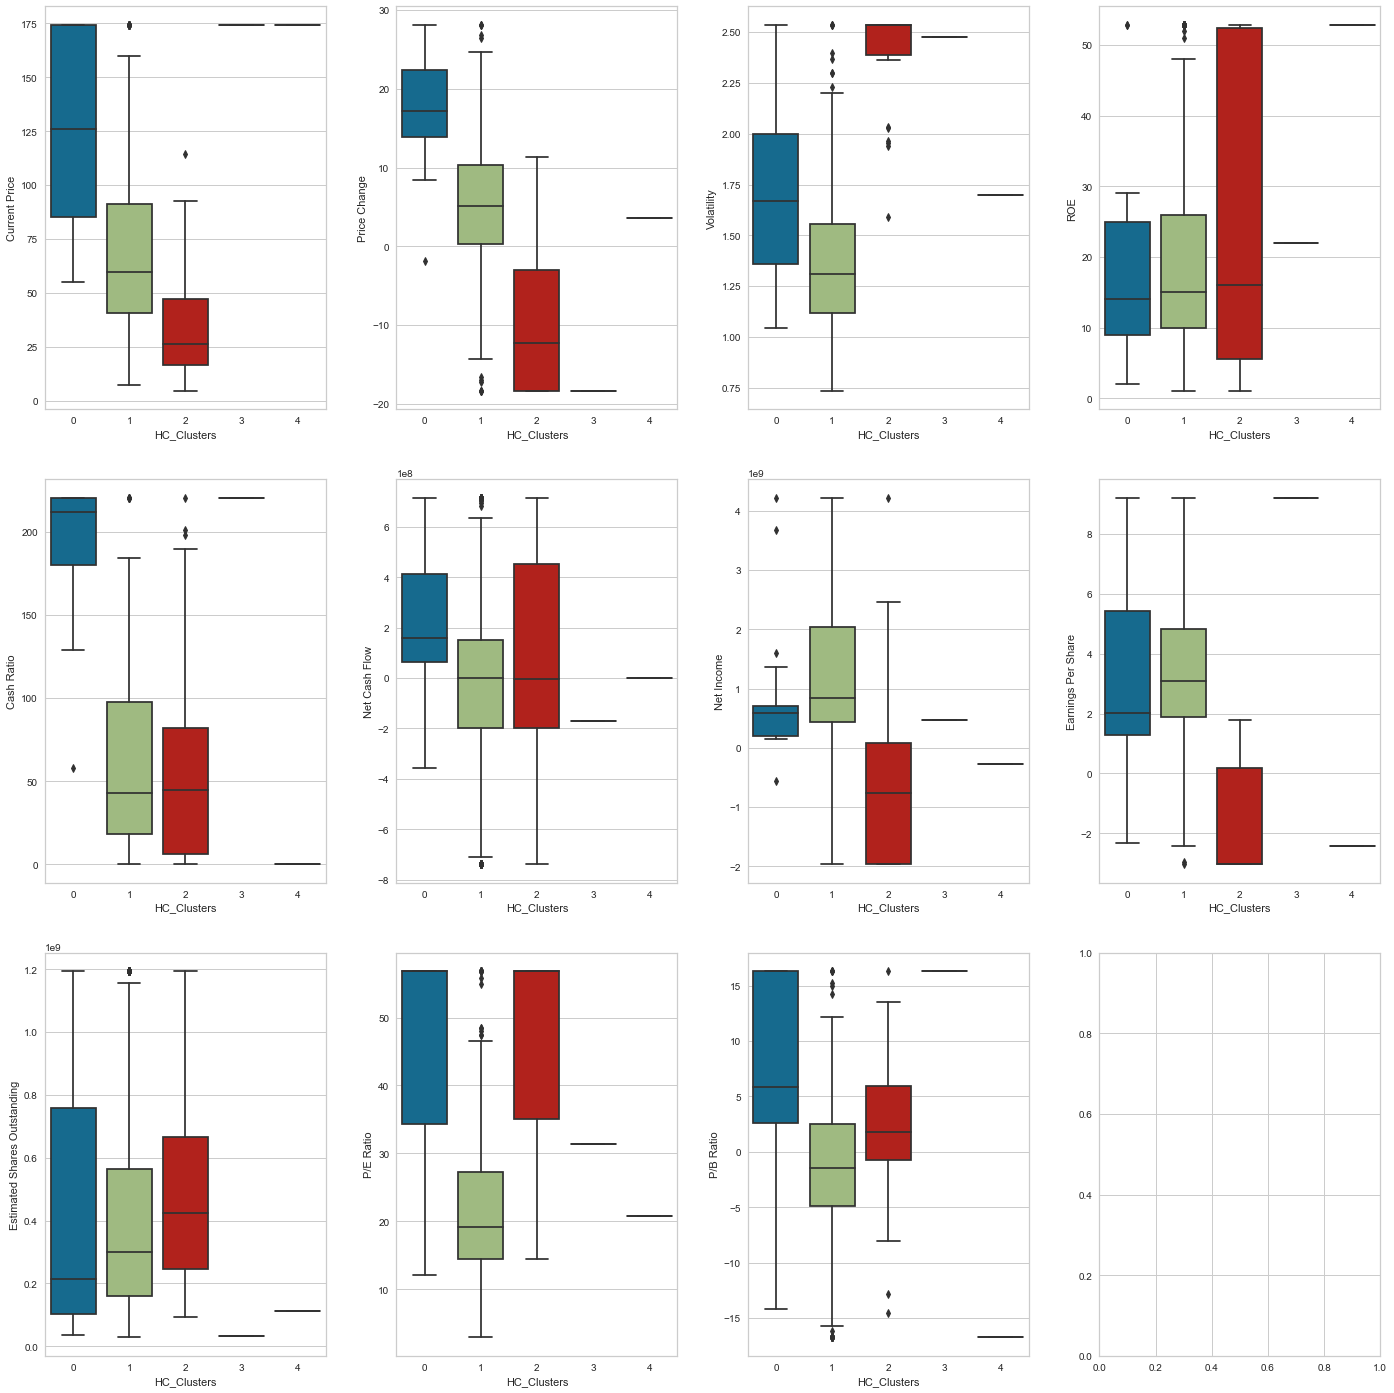

In [71]:

fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df3,
                y=df3.columns[4+counter],
                x="HC_Clusters",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

### K-means clustering

In [72]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(k_means_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [73]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.41551508307968876

- **The first two principal components explain 41.5% of the variance in the data.**

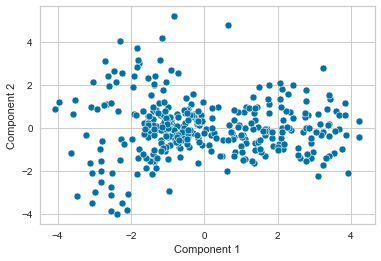

In [74]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2");

**Let's colour the scatterplot by cluster labels.**

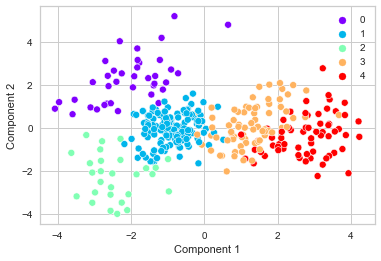

In [75]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1));

### Hierarchical  Clustering

In [76]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(hc_df)
reduced_df_pca1 = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [77]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.38533333348340343

- The first two principal components explain 38.5% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

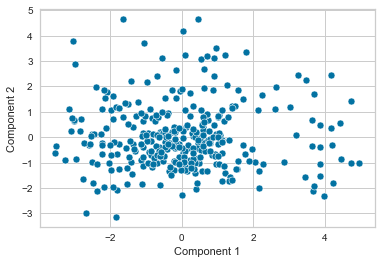

In [78]:
sns.scatterplot(data=reduced_df_pca1, x="Component 1", y="Component 2")

**Let's colour the scatterplot by cluster labels.**

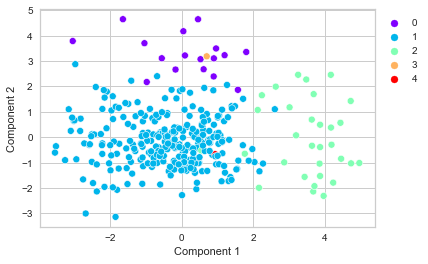

In [79]:
sns.scatterplot(
    data=reduced_df_pca1,
    x="Component 1",
    y="Component 2",
    hue=df3["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- **Cluster 1 is the largest cluster**
- **Cluster 3 has only one element, this element could be considered to fall in cluster 0**

## K-means vs Hierarchical Clustering

### NB:
- I tried clustering using both data with outliers and without outliers. I decided to used data with outliers treated for efficient clustering.

#### Observations:
- K-means clustering is giving well seperated clusters
- The largest cluster of obtained using Hierarchical clustering has 290 companies while the largest cluster obtained during K-means clustering has 138 companies
- Some clusters obtained uisng hierarchical clustering method have one companies which could be merged in other clusters leading to formation of just 3 clusters.
- In both algorithms, 5 clusters were obtained as the appropriate number of clusters
- In both algorithms, the segments with the highest number of companies in the energy sector have had a negative price change of stocks in the past 13 weeks, have the least average current stock price, have low net income and low earnings per share.
- Agglomerative clustering took the lowest wall time when running as compared to k-means ckustering

## Actionable Insights and Recommendations

-  I recommend the Kmeans clustering as it has no redudant clusters as compared to Hierarchical clustering that is giving clusters with one company for the same number clusters.
- Depending on K-means clustering, below are the Insights and recommendations:

### Insights:
### Cluster 0:
**As compared to other clusters**,
    - This cluster has 38 companies
    - Current stock price is the second highest
    - The companies in this cluster the highest positive percentage change in stock price in the past 13 weeks
    - The average volatility is the second highest in the past 13 weeks
    - The average ROE is the second lowest
    - The companies have highest average cash Ratio
    - Average net cash Ratio is the highest 
    - Net Income is the second lowest
    - Average earnings per share value is the third lowest
    - The average estimated shares outstanding value is the third highest
    - Average P/E Ratio value is the second highest
    - Average P/B value ratio is highest
    
 **NB: Generally, Cluster 0 is the best performing one**
#### cluster 1:
**As compared to other clusters**,
    - This cluster has 138 companies
    - Current stock price is the second lowest
    - The companies in this cluster the third highest positive percentage change in stock price in the past 13 weeks
    - The average volatility is the third highest in the past 13 weeks
    - The average ROE is the lowest
    - The companies have the third highest average cash Ratio
    - Average net cash flow is the second lowest with a negative value
    - Net Income is the third lowest
    - Average earnings per share value is the second lowest
    - The average estimated shares outstanding value is the second lowest
    - Average P/E Ratio value is the second lowest 
    - Average P/B ratio value is the second lowest with a negative value


###  cluster 2
**As compared to other clusters**,
    - This cluster has 28 companies
    - Current stock price is the lowest
    - The companies in this cluster the lowest percentage change in stock price in the past 13 weeks
    - The average volatility value is the highest
    - The average ROE is the highest
    - The companies have the second lowest average cash Ratio
    - Average net cash flow is the lowest 
    - The average Net Income is the lowest with a negative value
    - Average earnings per share value is the lowest with a negative value
    - The average estimated shares outstanding value is the second highest
    - Average P/E Ratio is the highest 
    - Average P/B ratio is the second highest


### cluster 3
**As compared to other clusters**,
    - This cluster has 73 companies
    - Current stock price is the highest
    - The companies in this cluster the second lowest percentage change in stock price in the past 13 weeks
    - The average volatility is the second lowest
    - The average ROE is the second highest
    - The companies have highest average cash Ratio
    - Average net cash flow is the lowest
    - Net Income is the second highest
    - Average earnings per share value is the highest
    - The average estimated shares outstanding value is the lowest
    - Average P/E Ratio is the third lowest
    - Average P/B ratio is lowest


### cluster 4
**As compared to other clusters**,
    - This cluster has 63 companies
    - Current stock price is the third highest
    - The companies in this cluster the second highest percentage change in stock price in the past 13 weeks
    - The average volatility is the lowest
    - The average ROE is the third highest
    - The companies have second highest average cash Ratio
    - Average net cash flow is the highest 
    - Net Income is the highest
    - Average earnings per share value is the second highest
    - The average estimated shares outstanding value is the highest
    - Average P/E Ratio is the lowest
    - Average P/B ratio is the third lowest


### Recommendations:

- During EDA, we saw that the energy sector showed the highest price decreament over the past 13 weeks and highest volatilty.  After clustering we see that the segment with the lowest number(28) of companies count has mostly the companies in the energy sector(22/30 of them). The companies in this segment are high risk investment companies(high volatility) as most of the average attributes are the least as compared to other segments. On average, they have the the lowest price change, lowest current price of stocks, lowest Net cash flow, Lowest Net income, lowest earnings per share value and hughest volatility as compared to other segments.
- On average, Companies in segement 0 with 38 companies seem to be good companies to invest in as in the past 13 weeks, the showed a the highest positive change in stock prices, have the highest Cash Ratio, Net cash flow and P/B ratio
- On average Companies in segment three with 73 companies have the highest current stock prices and highest earnings per share but with the lowest cash ratio, lowest estimated shares outstanding and lowest P/B ratio.